In [18]:
# Load csv with the validation results per epoch

import pandas as pd
import matplotlib.pyplot as plt
import sys



In [19]:
path = r'c:\Users\jalvarez\Documents\Data\newruns\runs\new_encoder_no_linearResCon\General_Contacts\average_validation.csv'

df = pd.read_csv(path)

df.head()

,Wall time,Step,Value
0,1.728048e+09,0,0.770581
1,1.728048e+09,1,0.767136
2,1.728048e+09,2,0.784175
3,1.728049e+09,3,0.789286
4,1.728049e+09,4,0.788986


In [20]:
# Drop the lines 161, 162, 163, 164, 165 and 166
df = df.drop(df.index[161:167])

In [ ]:
df.iloc[150:170, :]

In [21]:
# Keep only each 10 epochs
df = df.iloc[::10, :]
df


,Wall time,Step,Value
0,1.728048e+09,0,0.770581
10,1.728051e+09,10,0.806538
20,1.728054e+09,20,0.815468
30,1.728058e+09,30,0.825214
40,1.728061e+09,40,0.828397
50,1.728064e+09,50,0.823199
60,1.728067e+09,60,0.835329
70,1.728070e+09,70,0.837939
80,1.728073e+09,80,0.836905
90,1.728077e+09,90,0.828133


In [22]:
df.drop(columns=['Wall time'], inplace=True)


In [23]:
max = df['Value'].max()
print(max)
argmax = df['Value'].argmax()
print(df.iloc[argmax])

0.8584352135658264
Step     290.000000
Value      0.858435
Name: 296, dtype: float64


In [24]:
min = df['Value'].min()

C:\Users\jalvarez\AppData\Local\Temp\ipykernel_4340\1870879057.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(df.iloc[argmax]['Step'], df.iloc[argmax]['Value'], 'ro', label='Max Value', color='red', markersize=10)


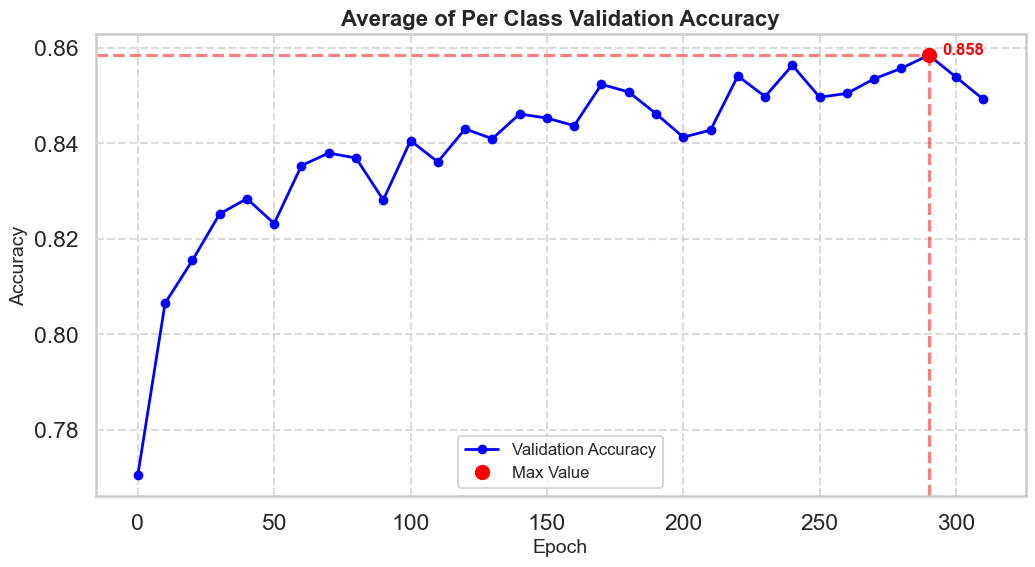

In [50]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(epoch, value, label='Validation Accuracy', color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Plot the max value
plt.plot(df.iloc[argmax]['Step'], df.iloc[argmax]['Value'], 'ro', label='Max Value', color='red', markersize=10)

# Trace the lines to the max value
plt.axhline(y=max, xmax=0.90, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=df.iloc[argmax]['Step'], ymax=0.955, color='red', linestyle='--', alpha=0.5)

# Add the max value
plt.text(df.iloc[argmax]['Step'] + 5, max, f'{max:.3f}', color='red', fontsize=12, fontweight='bold')

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.title('Average of Per Class Validation Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Show the plot
plt.show()


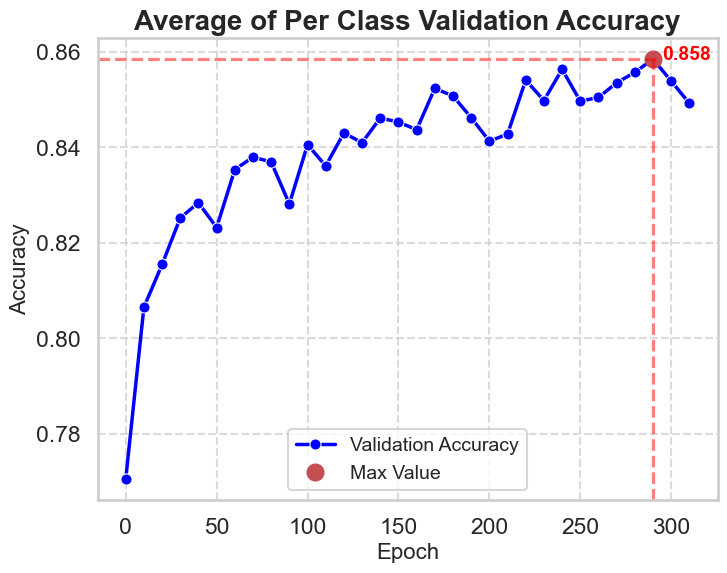

In [61]:
import seaborn as sns

# Set the style and context for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=epoch, y=value, label='Validation Accuracy', color='blue', marker='o', linewidth=2.5, markersize=8)

# Plot the max value
plt.plot(df.iloc[argmax]['Step'], df.iloc[argmax]['Value'], 'ro', label='Max Value', markersize=12)

# Trace the lines to the max value
plt.axhline(y=max, xmax=0.90, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=df.iloc[argmax]['Step'], ymax=0.955, color='red', linestyle='--', alpha=0.5)

# Add the max value
plt.text(df.iloc[argmax]['Step'] + 5, max, f'{max:.3f}', color='red', fontsize=14, fontweight='bold')

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=14)
plt.title('Average of Per Class Validation Accuracy', fontsize=20, fontweight='bold')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

# Show the plot
plt.show()


In [63]:
import joblib

In [64]:
# load model
model = joblib.load('baseline_models/new_dataset/model_sniffR.pkl')

In [78]:
model.learning_rate_init

0.001

In [72]:
num_coef = 0
for layer in model.coefs_:
    num_coef += layer.size
        

num_coef

20900